In this code, I'll create a small version of a put call ratio that i'll implement on c++. This code is just a prototype to the complex model develop on c++

In [1]:
#Import the neccessaries libraries
import os
import dotenv
from datetime import date
from dateutil.relativedelta import relativedelta
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import datetime
from polygon import RESTClient
import yfinance as yahoofinance
import re

dotenv.load_dotenv('Keys')
Api_Key = os.environ['Options_Key']

In [2]:
client = RESTClient(api_key=Api_Key)

In [3]:
end_date = date.today()
start_date = end_date - relativedelta(years=2)

In [378]:
ticker = input()

EPD


In [379]:
#Accessing the data to get the current daily price
data = yahoofinance.download(ticker)
symbol = yahoofinance.Ticker(ticker)
data = symbol.history(period="1y")
price = data.Close[-1]

[*********************100%%**********************]  1 of 1 completed


In [380]:
#Parsing the list to get the contract names
contract_names = []

for c in client.list_options_contracts(underlying_ticker=ticker, limit=1000):
    contract_names.append(c)
print(contract_names)

[OptionsContract(additional_underlyings=None, cfi='OCASPS', contract_type='call', correction=None, exercise_style='american', expiration_date='2023-10-27', primary_exchange='BATO', shares_per_contract=100, strike_price=15, ticker='O:EPD231027C00015000', underlying_ticker='EPD'), OptionsContract(additional_underlyings=None, cfi='OCASPS', contract_type='call', correction=None, exercise_style='american', expiration_date='2023-10-27', primary_exchange='BATO', shares_per_contract=100, strike_price=16, ticker='O:EPD231027C00016000', underlying_ticker='EPD'), OptionsContract(additional_underlyings=None, cfi='OCASPS', contract_type='call', correction=None, exercise_style='american', expiration_date='2023-10-27', primary_exchange='BATO', shares_per_contract=100, strike_price=17, ticker='O:EPD231027C00017000', underlying_ticker='EPD'), OptionsContract(additional_underlyings=None, cfi='OCASPS', contract_type='call', correction=None, exercise_style='american', expiration_date='2023-10-27', primary

In [381]:
table = pd.DataFrame(contract_names)

In [382]:
table

,additional_underlyings,cfi,contract_type,correction,exercise_style,expiration_date,primary_exchange,shares_per_contract,strike_price,ticker,underlying_ticker
0,None,OCASPS,call,None,american,2023-10-27,BATO,100,15.0,O:EPD231027C00015000,EPD
1,None,OCASPS,call,None,american,2023-10-27,BATO,100,16.0,O:EPD231027C00016000,EPD
2,None,OCASPS,call,None,american,2023-10-27,BATO,100,17.0,O:EPD231027C00017000,EPD
3,None,OCASPS,call,None,american,2023-10-27,BATO,100,18.0,O:EPD231027C00018000,EPD
4,None,OCASPS,call,None,american,2023-10-27,BATO,100,19.0,O:EPD231027C00019000,EPD
...,...,...,...,...,...,...,...,...,...,...,...
553,None,OPASPS,put,None,american,2026-01-16,BATO,100,30.0,O:EPD260116P00030000,EPD
554,None,OPASPS,put,None,american,2026-01-16,BATO,100,32.0,O:EPD260116P00032000,EPD
555,None,OPASPS,put,None,american,2026-01-16,BATO,100,35.0,O:EPD260116P00035000,EPD
556,None,OPASPS,put,None,american,2026-01-16,BATO,100,37.0,O:EPD260116P00037000,EPD


In [383]:
#Getting the expiration date to be able to parse the data by specific date
exp_date = table["expiration_date"]
exp_date = pd.DataFrame(exp_date)
exp_date

,expiration_date
0,2023-10-27
1,2023-10-27
2,2023-10-27
3,2023-10-27
4,2023-10-27
...,...
553,2026-01-16
554,2026-01-16
555,2026-01-16
556,2026-01-16


In [384]:
len(table)

558

In [422]:
table["expiration_date"]

0      2023-10-27
1      2023-10-27
2      2023-10-27
3      2023-10-27
4      2023-10-27
          ...    
553    2026-01-16
554    2026-01-16
555    2026-01-16
556    2026-01-16
557    2026-01-16
Name: expiration_date, Length: 558, dtype: object

In [423]:
#Getting the expiration data number, contract type, and ticker to start getting the put call ratio
number = []
contract_type = []
tick = []
for i in range(len(table)):
    if table["expiration_date"][i]=="2023-12-15":
        number.append(i)
        contract_type.append(table["contract_type"][i])
        tick.append(table["ticker"][i])
    else:
        i

In [424]:
tick

['O:EPD231215C00015000',
 'O:EPD231215C00018000',
 'O:EPD231215C00019000',
 'O:EPD231215C00020000',
 'O:EPD231215C00021000',
 'O:EPD231215C00022000',
 'O:EPD231215C00023000',
 'O:EPD231215C00024000',
 'O:EPD231215C00025000',
 'O:EPD231215C00026000',
 'O:EPD231215C00027000',
 'O:EPD231215C00028000',
 'O:EPD231215C00029000',
 'O:EPD231215C00030000',
 'O:EPD231215C00031000',
 'O:EPD231215C00032000',
 'O:EPD231215C00033000',
 'O:EPD231215C00034000',
 'O:EPD231215C00035000',
 'O:EPD231215P00015000',
 'O:EPD231215P00018000',
 'O:EPD231215P00019000',
 'O:EPD231215P00020000',
 'O:EPD231215P00021000',
 'O:EPD231215P00022000',
 'O:EPD231215P00023000',
 'O:EPD231215P00024000',
 'O:EPD231215P00025000',
 'O:EPD231215P00026000',
 'O:EPD231215P00027000',
 'O:EPD231215P00028000',
 'O:EPD231215P00029000',
 'O:EPD231215P00030000',
 'O:EPD231215P00031000',
 'O:EPD231215P00032000',
 'O:EPD231215P00033000',
 'O:EPD231215P00034000',
 'O:EPD231215P00035000']

In [425]:
#Creating a table to extract the information
options_table = pd.DataFrame({"Option Number": number,
                            "Contract Type": contract_type,
                            "Ticker" : tick})

In [426]:
#Parsing the contracts by calls or puts contracts
call = []
put = []
for i in range(len(options_table)):
    if options_table["Contract Type"][i] == "call":
        call.append(options_table["Ticker"][i])
    else:
        put.append(options_table['Ticker'][i])

In [427]:
call_price = pd.DataFrame(price_table[:len(call)])

In [428]:
#Getting the price stored in the ticker symbol for this example 
price_table = []
for i in range(len(options_table)):
    string = options_table["Ticker"][i]
    strike_price = string[-5:-3]
    price_table.append(strike_price)

In [429]:
price_table

['15',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '15',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35']

In [430]:
price

27.079999923706055

In [431]:
call_price

,0
0,15
1,18
2,19
3,20
4,21
5,22
6,23
7,24
8,25
9,26


In [432]:
#Finding the contract associated with a strike price of 28
n = []

for i in range(len(call_price)):
    if call_price[0][i]=="28":
        n.append(i)
    else:
        n

In [433]:
n

[11]

In [434]:
put_price = pd.DataFrame(price_table[len(call):])
put_price

,0
0,15
1,18
2,19
3,20
4,21
5,22
6,23
7,24
8,25
9,26


In [435]:
call

['O:EPD231215C00015000',
 'O:EPD231215C00018000',
 'O:EPD231215C00019000',
 'O:EPD231215C00020000',
 'O:EPD231215C00021000',
 'O:EPD231215C00022000',
 'O:EPD231215C00023000',
 'O:EPD231215C00024000',
 'O:EPD231215C00025000',
 'O:EPD231215C00026000',
 'O:EPD231215C00027000',
 'O:EPD231215C00028000',
 'O:EPD231215C00029000',
 'O:EPD231215C00030000',
 'O:EPD231215C00031000',
 'O:EPD231215C00032000',
 'O:EPD231215C00033000',
 'O:EPD231215C00034000',
 'O:EPD231215C00035000']

In [436]:
put

['O:EPD231215P00015000',
 'O:EPD231215P00018000',
 'O:EPD231215P00019000',
 'O:EPD231215P00020000',
 'O:EPD231215P00021000',
 'O:EPD231215P00022000',
 'O:EPD231215P00023000',
 'O:EPD231215P00024000',
 'O:EPD231215P00025000',
 'O:EPD231215P00026000',
 'O:EPD231215P00027000',
 'O:EPD231215P00028000',
 'O:EPD231215P00029000',
 'O:EPD231215P00030000',
 'O:EPD231215P00031000',
 'O:EPD231215P00032000',
 'O:EPD231215P00033000',
 'O:EPD231215P00034000',
 'O:EPD231215P00035000']

In [437]:
n

[11]

In [515]:
#Requesting the data
daily_option_data_call = client.get_aggs(ticker=options_table["Ticker"][n[0]],
                                   multiplier=1,
                                   timespan='day',
                                  from_=start_date,
                                   to=end_date) 

In [516]:
daily_option_data_call = pd.DataFrame(daily_option_data_call)

In [517]:
daily_option_data_call

,open,high,low,close,volume,vwap,timestamp,transactions,otc
0,0.70,0.70,0.70,0.70,10,0.7000,1681963200000,1,None
1,0.72,0.72,0.70,0.71,88,0.7023,1682049600000,4,None
2,0.76,0.76,0.76,0.76,10,0.7600,1682308800000,1,None
3,0.67,0.67,0.66,0.66,11,0.6691,1682395200000,2,None
4,0.64,0.64,0.64,0.64,50,0.6400,1682481600000,1,None
...,...,...,...,...,...,...,...,...,...
123,0.26,0.28,0.22,0.24,246,0.2638,1698033600000,24,None
124,0.27,0.27,0.23,0.26,67,0.2442,1698120000000,13,None
125,0.25,0.25,0.20,0.22,258,0.2347,1698206400000,25,None
126,0.17,0.20,0.15,0.17,190,0.1677,1698292800000,25,None


In [518]:
call_timestamps = daily_option_data_call["timestamp"]

In [519]:
#Getting the date to get the volume for the put call ratio for specific days
dates = [datetime.datetime.fromtimestamp(ts // 1000) for ts in call_timestamps]

# Print the dates
for date in dates:
    print(date)

2023-04-19 23:00:00
2023-04-20 23:00:00
2023-04-23 23:00:00
2023-04-24 23:00:00
2023-04-25 23:00:00
2023-04-27 23:00:00
2023-04-30 23:00:00
2023-05-01 23:00:00
2023-05-03 23:00:00
2023-05-04 23:00:00
2023-05-07 23:00:00
2023-05-08 23:00:00
2023-05-10 23:00:00
2023-05-11 23:00:00
2023-05-14 23:00:00
2023-05-15 23:00:00
2023-05-16 23:00:00
2023-05-17 23:00:00
2023-05-21 23:00:00
2023-05-22 23:00:00
2023-05-24 23:00:00
2023-05-25 23:00:00
2023-05-29 23:00:00
2023-05-30 23:00:00
2023-05-31 23:00:00
2023-06-01 23:00:00
2023-06-04 23:00:00
2023-06-05 23:00:00
2023-06-06 23:00:00
2023-06-07 23:00:00
2023-06-08 23:00:00
2023-06-11 23:00:00
2023-06-12 23:00:00
2023-06-13 23:00:00
2023-06-14 23:00:00
2023-06-15 23:00:00
2023-06-19 23:00:00
2023-06-20 23:00:00
2023-06-21 23:00:00
2023-06-22 23:00:00
2023-06-25 23:00:00
2023-06-26 23:00:00
2023-06-27 23:00:00
2023-06-28 23:00:00
2023-06-29 23:00:00
2023-07-02 23:00:00
2023-07-04 23:00:00
2023-07-05 23:00:00
2023-07-06 23:00:00
2023-07-09 23:00:00


In [520]:
call_volume = daily_option_data_call.volume

In [521]:
call_volume

0       10
1       88
2       10
3       11
4       50
      ... 
123    246
124     67
125    258
126    190
127     79
Name: volume, Length: 128, dtype: int64

In [522]:
call_volume = call_volume.shift(-102).dropna()

In [523]:
daily_option_data_put = client.get_aggs(ticker=options_table["Ticker"][len(call)+n[0]],
                                   multiplier=1,
                                   timespan='day',
                                   from_=start_date,
                                   to=end_date)

In [524]:
daily_option_data_put = pd.DataFrame(daily_option_data_put)

In [525]:
call_volume

0       79.0
1       75.0
2     1065.0
3      130.0
4      116.0
5        5.0
6        9.0
7       11.0
8      166.0
9      137.0
10      22.0
11     732.0
12      25.0
13      10.0
14       2.0
15     141.0
16      40.0
17      47.0
18     144.0
19     818.0
20     131.0
21     246.0
22      67.0
23     258.0
24     190.0
25      79.0
Name: volume, dtype: float64

In [526]:
put_volume = daily_option_data_put.volume
put_volume

0      3
1     12
2      8
3      7
4     26
5      9
6      5
7      6
8      6
9      5
10    27
11     1
12    17
13     9
14     1
15     4
16    11
17     1
18     5
19    10
20    10
21     5
22     3
23    13
24     1
25     1
Name: volume, dtype: int64

In [527]:
put_timestamps = daily_option_data_put["timestamp"]

In [528]:
pt =[]
put_dates = [datetime.datetime.fromtimestamp(ts // 1000) for ts in put_timestamps]

# Print the dates
for date in put_dates:
    print(date)
    pt.append(date)

2023-07-05 23:00:00
2023-07-06 23:00:00
2023-07-10 23:00:00
2023-07-17 23:00:00
2023-07-19 23:00:00
2023-07-23 23:00:00
2023-07-24 23:00:00
2023-07-25 23:00:00
2023-07-27 23:00:00
2023-07-30 23:00:00
2023-07-31 23:00:00
2023-08-09 23:00:00
2023-08-14 23:00:00
2023-08-15 23:00:00
2023-08-29 23:00:00
2023-08-31 23:00:00
2023-09-14 23:00:00
2023-09-21 23:00:00
2023-09-24 23:00:00
2023-09-27 23:00:00
2023-10-02 23:00:00
2023-10-11 23:00:00
2023-10-18 23:00:00
2023-10-22 23:00:00
2023-10-23 23:00:00
2023-10-25 23:00:00


In [529]:
pd.DataFrame(pt)#.shift(-6).dropna()

,0
0,2023-07-05 23:00:00
1,2023-07-06 23:00:00
2,2023-07-10 23:00:00
3,2023-07-17 23:00:00
4,2023-07-19 23:00:00
5,2023-07-23 23:00:00
6,2023-07-24 23:00:00
7,2023-07-25 23:00:00
8,2023-07-27 23:00:00
9,2023-07-30 23:00:00


In [530]:
put_volume#.shift(-2)

0      3
1     12
2      8
3      7
4     26
5      9
6      5
7      6
8      6
9      5
10    27
11     1
12    17
13     9
14     1
15     4
16    11
17     1
18     5
19    10
20    10
21     5
22     3
23    13
24     1
25     1
Name: volume, dtype: int64

In [535]:
#Creating a put/call ration based on the volume for that specific contract 
put_call_ratio = put_volume/call_volume

In [536]:
put_call_ratio = put_call_ratio.dropna()
put_call_ratio

0     0.037975
1     0.160000
2     0.007512
3     0.053846
4     0.224138
5     1.800000
6     0.555556
7     0.545455
8     0.036145
9     0.036496
10    1.227273
11    0.001366
12    0.680000
13    0.900000
14    0.500000
15    0.028369
16    0.275000
17    0.021277
18    0.034722
19    0.012225
20    0.076336
21    0.020325
22    0.044776
23    0.050388
24    0.005263
25    0.012658
Name: volume, dtype: float64

In [539]:
#Turning the list into a pandas DataFrame
pt_dataframe = pd.DataFrame({'Put Time': pt})#.shift(-).dropna()
pt_dataframe['Put/Call Ratio'] = put_call_ratio

In [541]:
pt_dataframe.dropna()

,Put Time,Put/Call Ratio
0,2023-07-05 23:00:00,0.037975
1,2023-07-06 23:00:00,0.160000
2,2023-07-10 23:00:00,0.007512
3,2023-07-17 23:00:00,0.053846
4,2023-07-19 23:00:00,0.224138
5,2023-07-23 23:00:00,1.800000
6,2023-07-24 23:00:00,0.555556
7,2023-07-25 23:00:00,0.545455
8,2023-07-27 23:00:00,0.036145
9,2023-07-30 23:00:00,0.036496


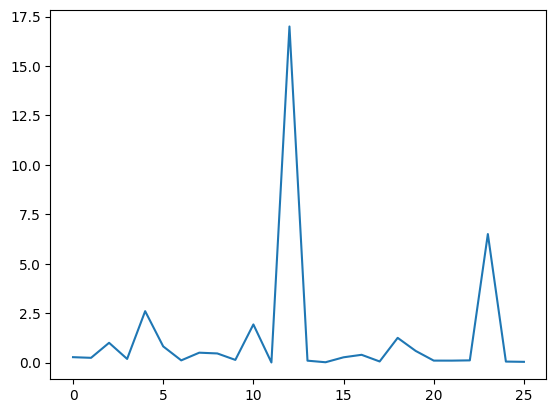

In [421]:
plt.plot(put_call_ratio)